In [32]:
#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
#define img and batch size
IMG_SIZE=224
BATCH_SIZE=32

In [34]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [35]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='binary',
subset='training'

)

Found 915 images belonging to 2 classes.


In [36]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
 subset='validation'
)

Found 227 images belonging to 2 classes.


In [38]:
#define the model
model=keras.Sequential(
    [
        layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3),activation='relu'),
         layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(1,activation='sigmoid')

    ]
)

In [39]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam',loss='binary_crossntropy',metrics=['accuracy'])

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5, validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.6251 - loss: 0.6939

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 358ms/step - accuracy: 0.6269 - loss: 0.6902 - val_accuracy: 0.7577 - val_loss: 0.4879
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.8348 - loss: 0.3674 - val_accuracy: 0.8018 - val_loss: 0.4368
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.8815 - loss: 0.2674 - val_accuracy: 0.8238 - val_loss: 0.3737
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9325 - loss: 0.1727 - val_accuracy: 0.8106 - val_loss: 0.3677
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.9719 - loss: 0.1172 - val_accuracy: 0.8546 - val_loss: 0.3072


In [46]:
model.save('/content/drive/MyDrive/brain_tumor_dataset/roshni.h5')

In [48]:
#load your model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/brain_tumor_dataset/roshni.h5')
print("model Loaded")

model Loaded


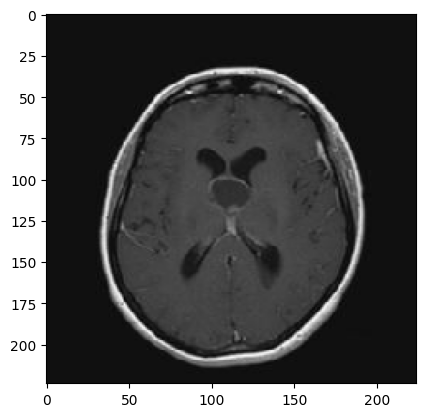

In [50]:
#load and view the test image
test_image_path="/content/drive/MyDrive/brain_tumor_dataset/train/No/N1432.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [51]:
#preprocessing the image
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [52]:
#make prediction
prediction = model.predict(img_array)
# print the prediction
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
[[0.06220474]]


In [53]:
if prediction > 0.5:
  print("Tumor Detected")
else:
  print("No Tumor")

No Tumor
